## Training linear model

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Linear regression with Normal equation

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3* X + np.random.rand(100,1)

Text(0.5,1,'generated data plot')

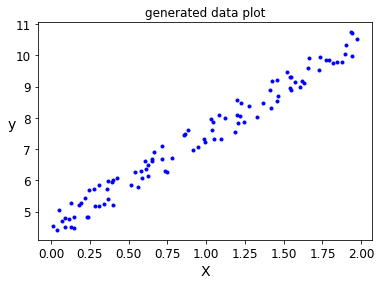

In [3]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y',rotation=0)
plt.title('generated data plot')

In [4]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [6]:
np.matmul(np.linalg.inv(np.matmul (X_b.T,X_b)),np.matmul(X_b.T,y)) # other way

array([[4.51359766],
       [2.98323418]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

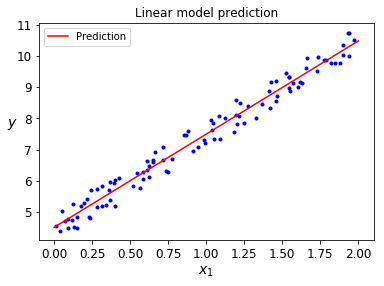

In [8]:
plt.plot(X,y,'b.')
plt.plot(X_new,y_predict,'r-',label='Prediction')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.title('Linear model prediction')
plt.legend()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [11]:
theta_best_svd,residual,rank,s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

## Linear Regression with Batch Gradient Descent

In [13]:
eta = 0.1
n_iterations =100
m =100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.46443636],
       [3.02664093]])

In [15]:
X_new_b.dot(theta)

array([[ 4.46443636],
       [10.51771822]])

In [16]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration >0 else 'r--'
            plt.plot(X_new , y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
        plt.xlabel('$x_1$', fontsize=18)
        plt.axis([0,2,0,15])
        plt.title(r'$\eta = {}$'.format(eta), fontsize=16)


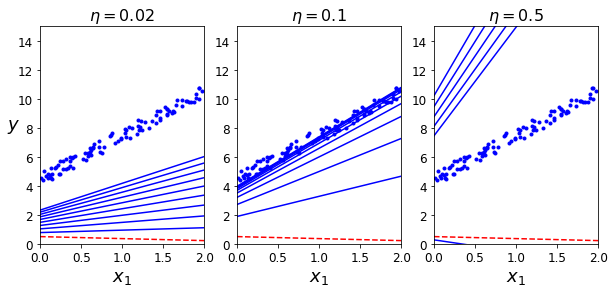

In [17]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta,eta=0.02)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1,theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

# Stochastic Gradient Descent

In [18]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

[0, 2, 0, 15]

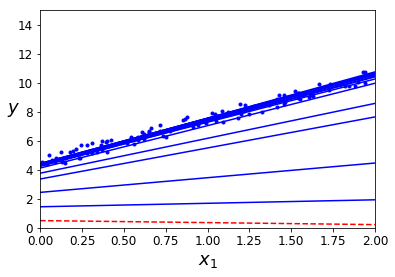

In [19]:
n_epochs = 50
t0,t1 = 5, 50 # learning schedule hyperparameter

def learning_schedule(t):
    return t0/(t + t1)
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i> 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
plt.plot(X,y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$',rotation=0, fontsize=18)
plt.axis([0,2, 0,15])

In [20]:
theta

array([[4.51548062],
       [2.9775157 ]])

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty =None, eta0=0.1,random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51388816]), array([2.98206789]))

# Mini- batch Gradient Descent

In [24]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t +=1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [25]:
theta

array([[4.52651397],
       [2.99723869]])

In [27]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

[2.5, 5, 2.3, 3.9]

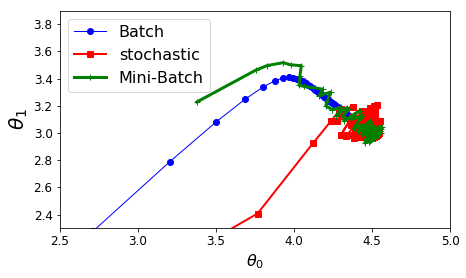

In [35]:
plt.figure(figsize = (7,4))
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],'b-o',lw=1,label='Batch')
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1], 'r-s',lw=2, label='stochastic')
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],'g-+',lw=3, label='Mini-Batch' )
plt.legend(loc='upper left', fontsize=16)
plt.xlabel(r'$\theta_0$', fontsize=16)
plt.ylabel(r'$\theta_1$', fontsize=20)
plt.axis([2.5,5, 2.3, 3.9])

## Polynomial regression

In [36]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [37]:
m  = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

[-3, 3, 0, 10]

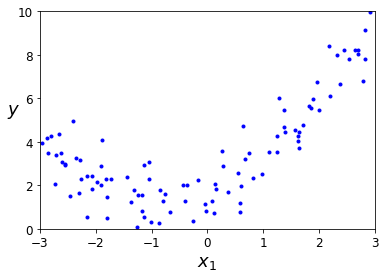

In [39]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0,fontsize=18)
plt.axis([-3,3,0,10])

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

[-3, 3, 0, 10]

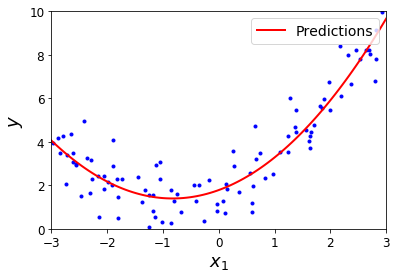

In [46]:
X_new = np.linspace(-3,3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y, 'b.')
plt.plot(X_new,y_new,'r-',lw=2,label='Predictions')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',fontsize=18)
plt.legend(loc='upper right',fontsize=14)
plt.axis([-3,3,0,10])

## Learning Curve

[-3, 3, 0, 10]

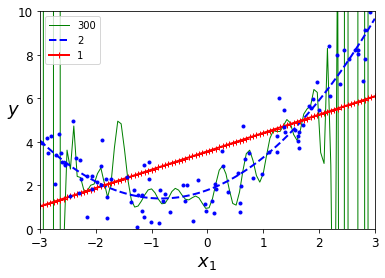

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_feature',polybig_features),
        ('std_scaler',std_scaler),
        ('lin_reg',lin_reg),
    ])
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new,y_newbig, style, label=str(degree),linewidth=width)

plt.plot(X,y,'b.',linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.axis([-3,3,0,10])

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.3,random_state=0)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
        
    plt.plot(np.sqrt(train_errors),'r-+',lw=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',lw=2, label='val')
    plt.legend(loc='upper right',fontsize=14)
    plt.xlabel('Training set size',fontsize=14)
    plt.ylabel('RMSE',fontsize=14)

[0, 80, 0, 3]

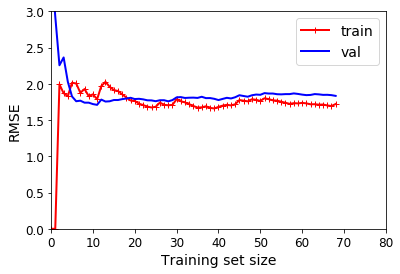

In [65]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)
plt.axis([0,80,0,3])

[0, 80, 0, 3]

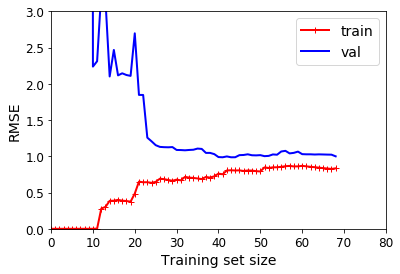

In [67]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10,include_bias=False)),
    ('lin_reg',lin_reg)
])
plot_learning_curve(polynomial_regression,X,y)
plt.axis([0,80,0,3])

## Regularized models

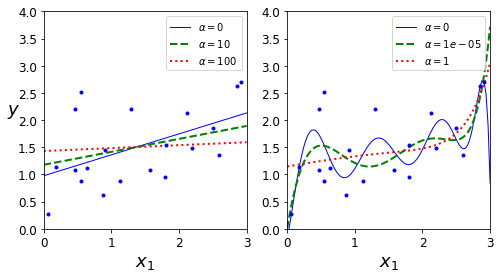

In [76]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m =20
X = 3 * np.random.rand(m,1)
y = 1+ 0.5 * X + np.random.randn(m, 1) /1.5
X_new = np.linspace(0, 3, 100).reshape(100,1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha,style in zip(alphas,('b-','g--','r:')):
        model = model_class(alpha, **model_kargs) if alpha >0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
                ('std_scaler',StandardScaler()),
                ('regul_reg',model)
            ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul,style,lw=lw,label=r"$\alpha = {}$".format(alpha))
    plt.plot(X,y, 'b.',lw=3)
    plt.legend(loc='upper right')
    plt.xlabel('$x_1$',fontsize=18)
    plt.axis([0,3,0,4])
        
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42)
plt.ylabel('$y$',fontsize=18,rotation=0)
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42)

In [77]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky',random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [78]:
sgd_reg = SGDRegressor(max_iter=5, penalty='l2', random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.13500145])

In [80]:
ridge_reg = Ridge(alpha=1, solver='sag',random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

/home/sudhir/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


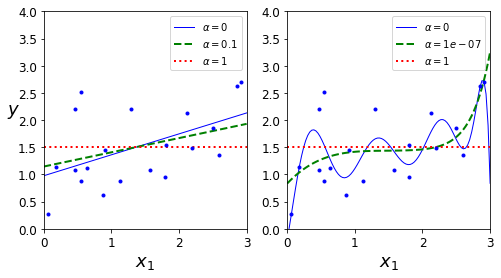

In [81]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso,polynomial=False, alphas=(0,0.1,1),random_state=42)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0,10**-7,1),random_state=42)


In [83]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [85]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

Text(0,0.5,'RMSE')

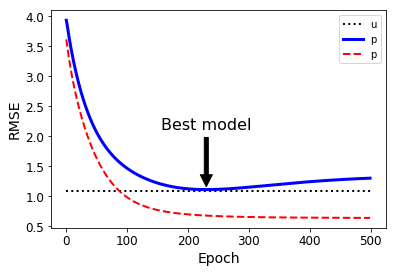

In [92]:
np.random.seed(42)
m =100
X = 6 * np.random.rand(m,1) -3
y = 2 + X + 0.5 * X**2 + np.random.randn(m,1)

X_train, X_val, y_train, y_val = train_test_split(X[:50],y[:50].ravel(), test_size=0.3, random_state=10)

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90,include_bias=False)),
    ('std_scaler', StandardScaler()),
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, penalty=None,eta0=0.0005,
                      warm_start =True, 
                       learning_rate='constant',
                      random_state=42)
n_epochs = 500
train_errors,val_errors = [],[]
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train,y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
    
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model', xy=(best_epoch, best_val_rmse),
            xytext=(best_epoch,best_val_rmse +1),
            ha='center',
            arrowprops =dict(facecolor='black',shrink=0.05),
            fontsize=16,
            )
best_val_rmse -= 0.03 # just to make the graph look better
plt.plot([0,n_epochs],[best_val_rmse,best_val_rmse],'k:',lw=2)
plt.plot(np.sqrt(val_errors),'b-',lw=3,label='Validation set')
plt.plot(np.sqrt(train_errors),'r--',lw=2,label='Training set')
plt.legend('upper right')
plt.xlabel('Epoch',fontsize=14)
plt.ylabel('RMSE',fontsize=14)

In [95]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1,warm_start=True,penalty=None,
                      learning_rate='constant',eta0=0.0005,random_state=42)

minimum_val_error = float('inf')
best_epoch = None
best_model =None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train) # countinues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [96]:
best_epoch, best_model

(999, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
        power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
        warm_start=True))

### Lasso verssus Ridge Regression

In [97]:
t1a,t1b,t2a,t2b = -1,3,-1.5,1.5

# ignoring bias term
t1s = np.linspace(t1a,t1b,500)
t2s = np.linspace(t2a,t2b,500)
t1,t2 = np.meshgrid(t1s,t2s)
T = np.c_[t1.ravel(),t2.ravel()]
Xr = np.array([[-1,1],[-0.3,-1],[1,0.1]])
yr = 2 * Xr[:, :1] + 0.5 *Xr[:, 1:]

# Logistic Regression

[-10, 10, -0.1, 1.1]

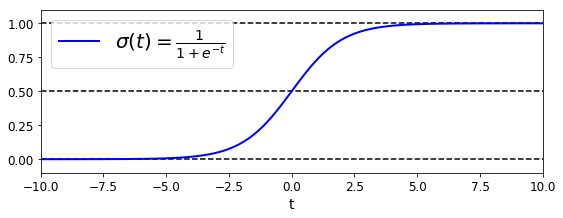

In [110]:
t = np.linspace(-10,10,100)
sig =  1/(1 + np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10,10],[0,0],'k--')
plt.plot([-10,10],[1,1],'k--')
plt.plot([-10,10],[0.5,0.5],'k--')
plt.plot(t,sig,'b-',lw=2, label = r'$\sigma(t) =\frac{1}{1 + e^{-t}}$')
plt.xlabel('t')
plt.legend(loc='upper left',fontsize =20)
plt.axis([-10,10,-0.1,1.1])

In [111]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [112]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [177]:
X = iris['data'][:,3:] # petal width 
y = (iris['target'] == 2).astype(np.int) # 1 if Iris -Virginica

In [178]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

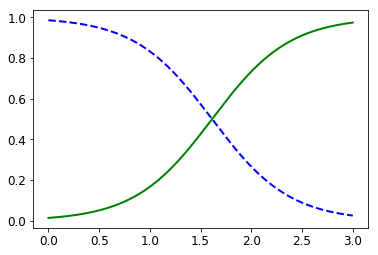

In [179]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

Text(0,0.5,'Probability')

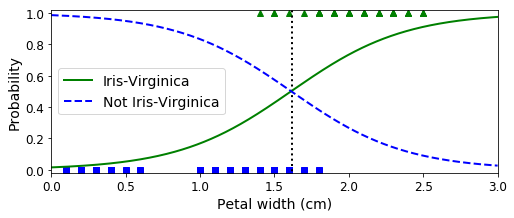

In [180]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1] >= 0.5][0]

plt.figure(figsize=(8,3))
plt.plot(X[y==0],y[y==0], 'bs')
plt.plot(X[y==1],y[y==1], 'g^')
plt.plot([decision_boundary, decision_boundary],[-1,2], 'k:',lw=2)
plt.plot(X_new,y_proba[:,1],'g-',lw=2,label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'b--',lw=2,label='Not Iris-Virginica')
plt.legend(loc='center left',fontsize=14)
plt.axis([0,3,-0.02,1.02])
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')

In [181]:
decision_boundary

array([1.61561562])

In [182]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

Text(6.5,2.3,'Iris-Virginica')

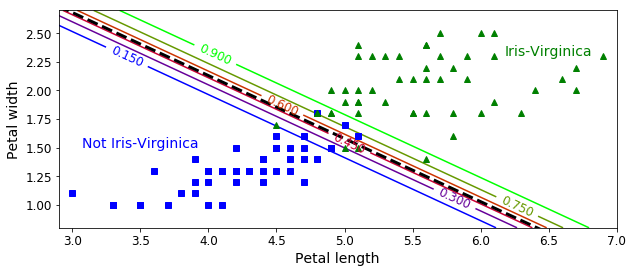

In [209]:
from sklearn.linear_model import LogisticRegression

X = iris['data'][:,(2,3)] # petal length petal width
y = (iris['target'] ==2 ).astype(np.int)

log_reg = LogisticRegression(C = 10**10, random_state=42)
log_reg.fit(X,y)

x0,x1 = np.meshgrid(
    np.linspace(2.9,7,500).reshape(-1,1),
    np.linspace(0.8,2.7,200).reshape(-1,1)
   )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10,4))
#plt.plot(X[y==0,0], X[y==0,1],'bs')
#plt.plot(X[y==1,0], X[y==1,1],'g^')
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs',)
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^',)

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0,x1,zz, cmap=plt.cm.brg,)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

left_right = np.array([2.9,7])
boundary = -(log_reg.coef_[0][0] *left_right + log_reg.intercept_[0])/log_reg.coef_[0][1]
plt.clabel(contour, inline=1,fontsize=12)
plt.plot(left_right,boundary,'k--',lw=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")


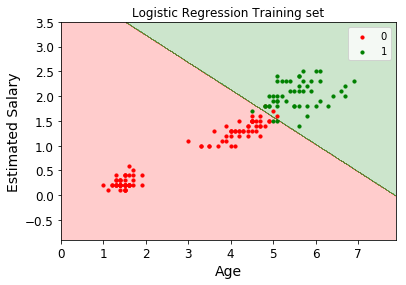

In [215]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X_set,y_set,classifier,dataset):
    X1,X2 = np.meshgrid(np.arange(X_set[:,0].min()-1,X_set[:,0].max()+1, step=0.01),
                        np.arange(X_set[:,1].min()-1,X_set[:,1].max()+1, step=0.01))
    X_new = np.c_[X1.ravel(),X2.ravel()]
    pred = classifier.predict(X_new).reshape(X1.shape)
    plt.contourf(X1,X2,pred, alpha=0.2, cmap=ListedColormap(('red','green')))
    
    plt.scatter(X_set[:,0][y_set==0], X_set[:,1][y_set==0], c='r', s=10, label='0')
    plt.scatter(X_set[:,0][y_set==1], X_set[:,1][y_set==1], c='g', s=10,label='1')
    plt.xlim(X1.min(),X1.max())
    plt.ylim(X2.min(),X2.max())
    plt.title('Logistic Regression'+dataset)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()
    
plot_decision_boundary(X,y,log_reg,' Training set')

In [216]:
# Multinomial regression
X = iris['data'][:,(2,3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10, random_state=42)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

[0, 7, 0, 3.5]

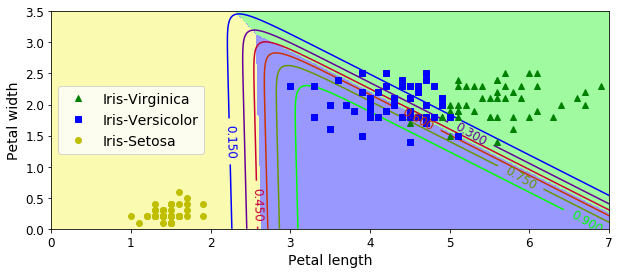

In [222]:
x0,x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1,1),
    np.linspace(0,3.5,200).reshape(-1,1)
    )
X_new = np.c_[x0.ravel(),x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2,0],X[y==2,1],'g^', label='Iris-Virginica')
plt.plot(X[y==1,0],X[y==2,1],'bs', label='Iris-Versicolor')
plt.plot(X[y==0,0],X[y==0,1],'yo', label='Iris-Setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0,x1, zz, cmap=custom_cmap)
contour = plt.contour(x0,x1,zz1,cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='center left', fontsize=14)
plt.axis([0,7, 0,3.5])

In [225]:
softmax_reg.predict([[5, 2]])

array([2])

In [224]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134078e-07, 5.75276066e-02, 9.42471760e-01]])